In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")

In [19]:
# Load exported results data
rating_pred_results = pd.read_csv("../data/rating_prediction_results.csv")
rating_pred_results = rating_pred_results.iloc[:, 1:]
item_recom_results = pd.read_csv("../data/item_recommendation_results.csv")
item_recom_results = item_recom_results.iloc[:, 1:]
knn_recom_results = pd.read_csv("../data/knn_recommendation_results.csv")
knn_recom_results = knn_recom_results.iloc[:, 1:]

# Clean up rating prediction data
for col in rating_pred_results.columns[1:]:
    rating_pred_results[col] = [val[:-1] for val in rating_pred_results[col].values]
    rating_pred_results[col] = rating_pred_results[col].astype(float)
#    
## Split the results based on dataset
ratings_half_split = int(rating_pred_results.shape[0]/2)
ml100_rating_pred = rating_pred_results.iloc[:ratings_half_split, :]
pda_rating_pred = rating_pred_results.iloc[ratings_half_split:, :]

item_half_split = int(item_recom_results.shape[0]/2)
ml100_item_recom = item_recom_results.iloc[:item_half_split, :]
pda_item_recom = item_recom_results.iloc[item_half_split:, :]

In [20]:
plt.rcParams["figure.figsize"] = (12,7)

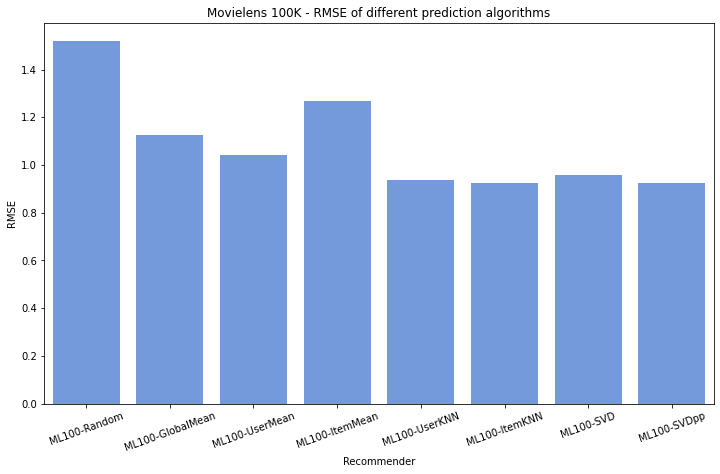

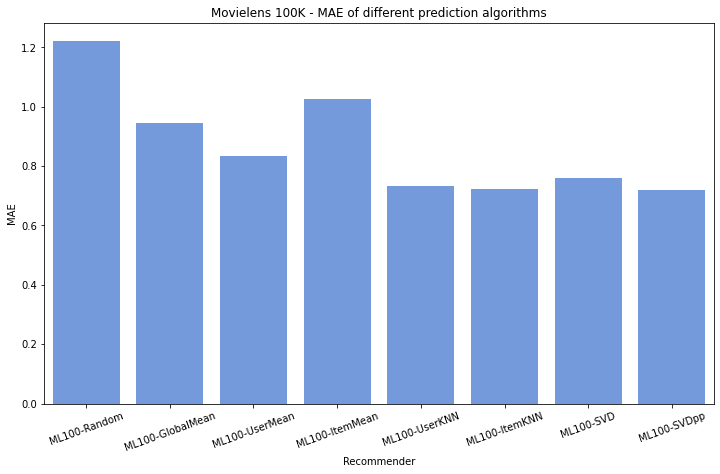

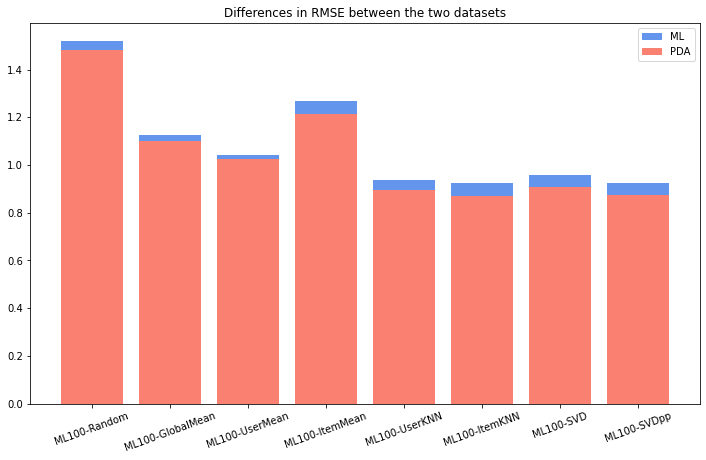

In [21]:
sns.barplot(x="Recommender", y="RMSE", data=ml100_rating_pred, color="cornflowerblue")
plt.xticks(rotation=20)
plt.title("Movielens 100K - RMSE of different prediction algorithms")
plt.show()

sns.barplot(x="Recommender", y="MAE", data=ml100_rating_pred, color="cornflowerblue")
plt.xticks(rotation=20)
plt.title("Movielens 100K - MAE of different prediction algorithms")
plt.show()

plt.bar(ml100_rating_pred["Recommender"], ml100_rating_pred["RMSE"], color="cornflowerblue", label="ML")
plt.bar(ml100_rating_pred["Recommender"], pda_rating_pred["RMSE"], color="salmon", label="PDA")
plt.xticks(rotation=20)
plt.title("Differences in RMSE between the two datasets")
plt.legend()
plt.show()

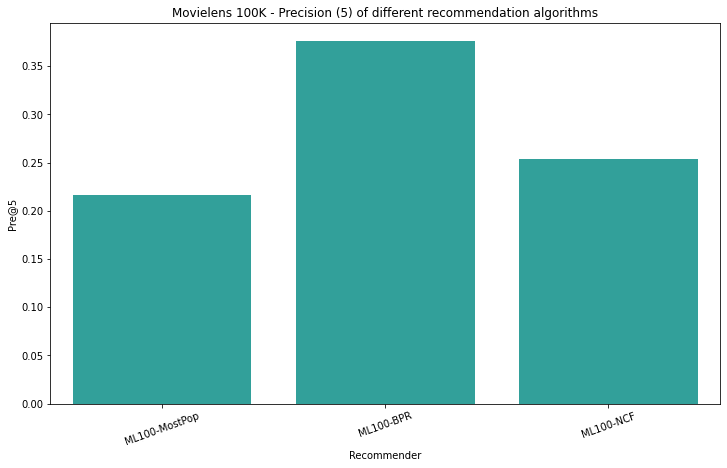

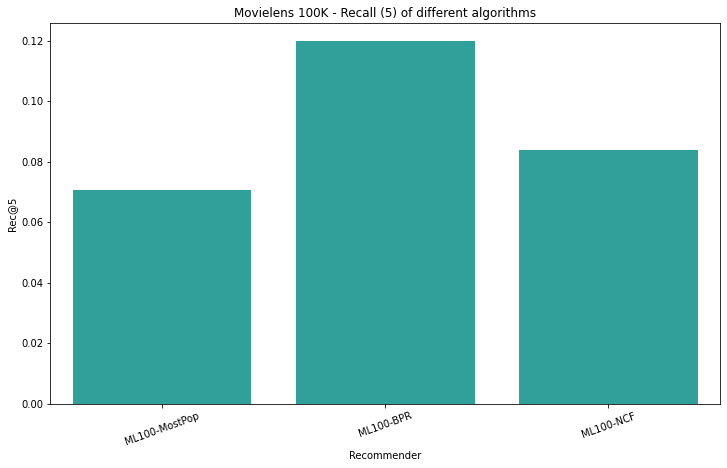

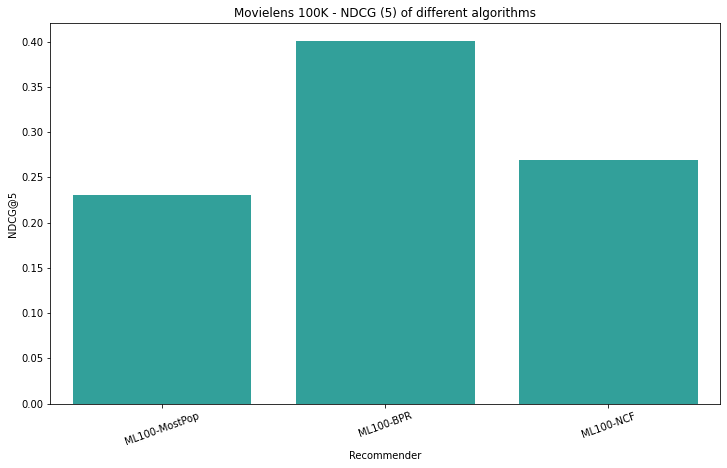

In [23]:
sns.barplot(x="Recommender", y="Pre@5", data=ml100_item_recom, color="lightseagreen")
plt.xticks(rotation=20)
plt.title("Movielens 100K - Precision (5) of different recommendation algorithms")
plt.show()

sns.barplot(x="Recommender", y="Rec@5", data=ml100_item_recom, color="lightseagreen")
plt.xticks(rotation=20)
plt.title("Movielens 100K - Recall (5) of different algorithms")
plt.show()


sns.barplot(x="Recommender", y="NDCG@5", data=ml100_item_recom, color="lightseagreen")
plt.xticks(rotation=20)
plt.title("Movielens 100K - NDCG (5) of different algorithms")
plt.show()